# Data cleaning
W tym pliku przygotuję zbiór danych do dalszej pracy.

## Import potrzebnych bibliotek.

In [329]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Wczytanie danych z plików CSV.

In [330]:
# główne dane
postings = pd.read_csv('postings.csv')

In [331]:
# dodatkowe informacje
job_industries = pd.read_csv('job_industries.csv')
industries = pd.read_csv('industries.csv')
job_skills = pd.read_csv('job_skills.csv')
skills = pd.read_csv('skills.csv')
employee_counts = pd.read_csv('employee_counts.csv')

## Sprawdzenie podstawowych informacji o danych:
### * postings.csv (struktura, ile jest braków w każdej kolumnie)

In [332]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [333]:
postings.head(5)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [334]:
missing_percent = (postings.isna().sum() / len(postings)) * 100
missing_percent.sort_values(ascending=False)

closed_time                   99.133622
skills_desc                   98.030666
med_salary                    94.929309
remote_allowed                87.689848
applies                       81.170619
max_salary                    75.944093
min_salary                    75.944093
currency                      70.873402
compensation_type             70.873402
normalized_salary             70.873402
pay_period                    70.873402
posting_domain                32.271556
application_url               29.604599
formatted_experience_level    23.745852
fips                          22.135827
zip_code                      16.852780
company_name                   1.387981
company_id                     1.386366
views                          1.363757
description                    0.005652
work_type                      0.000000
sponsored                      0.000000
job_id                         0.000000
listed_time                    0.000000
expiry                         0.000000


In [335]:
missing_percent[missing_percent > 0]

company_name                   1.387981
description                    0.005652
max_salary                    75.944093
pay_period                    70.873402
company_id                     1.386366
views                          1.363757
med_salary                    94.929309
min_salary                    75.944093
applies                       81.170619
remote_allowed                87.689848
application_url               29.604599
closed_time                   99.133622
formatted_experience_level    23.745852
skills_desc                   98.030666
posting_domain                32.271556
currency                      70.873402
compensation_type             70.873402
normalized_salary             70.873402
zip_code                      16.852780
fips                          22.135827
dtype: float64

In [336]:
postings.describe()

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,1.238490e+05,2.979300e+04,1.221320e+05,122160.000000,6280.000000,2.979300e+04,23320.000000,1.238490e+05,15246.0,1.238490e+05,1.073000e+03,1.238490e+05,123849.0,3.607300e+04,102977.000000,96434.000000
mean,3.896402e+09,9.193942e+04,1.220401e+07,14.618247,22015.619876,6.491085e+04,10.591981,1.713152e+12,1.0,1.716213e+12,1.712928e+12,1.713204e+12,0.0,2.053270e+05,50400.491887,28713.879887
std,8.404355e+07,7.011101e+05,2.554143e+07,85.903598,52255.873846,4.959738e+05,29.047395,4.848209e+08,0.0,2.321394e+09,3.622893e+08,3.989122e+08,0.0,5.097627e+06,30252.232515,16015.929825
min,9.217160e+05,1.000000e+00,1.009000e+03,1.000000,0.000000,1.000000e+00,1.000000,1.701811e+12,1.0,1.712903e+12,1.712346e+12,1.711317e+12,0.0,0.000000e+00,1001.000000,1003.000000
25%,3.894587e+09,4.828000e+01,1.435200e+04,3.000000,18.940000,3.700000e+01,1.000000,1.712863e+12,1.0,1.715481e+12,1.712670e+12,1.712886e+12,0.0,5.200000e+04,24112.000000,13121.000000
50%,3.901998e+09,8.000000e+04,2.269650e+05,4.000000,25.500000,6.000000e+04,3.000000,1.713395e+12,1.0,1.716042e+12,1.712670e+12,1.713408e+12,0.0,8.150000e+04,48059.000000,29183.000000
75%,3.904707e+09,1.400000e+05,8.047188e+06,8.000000,2510.500000,1.000000e+05,8.000000,1.713478e+12,1.0,1.716088e+12,1.713283e+12,1.713484e+12,0.0,1.250000e+05,78201.000000,42077.000000
max,3.906267e+09,1.200000e+08,1.034730e+08,9975.000000,750000.000000,8.500000e+07,967.000000,1.713573e+12,1.0,1.729125e+12,1.713562e+12,1.713573e+12,0.0,5.356000e+08,99901.000000,56045.000000


In [337]:
postings.describe(include='object')

,company_name,title,description,pay_period,location,formatted_work_type,job_posting_url,application_url,application_type,formatted_experience_level,skills_desc,posting_domain,work_type,currency,compensation_type
count,122130,123849,123842,36073,123849,123849,123849,87184,123849,94440,2439,83881,123849,36073,36073
unique,24428,72521,107827,5,8526,7,123849,84800,4,6,2212,4443,7,6,1
top,Liberty Healthcare and Rehabilitation Services,Sales Manager,Position Summary: Our Sales Manager has managi...,YEARLY,United States,Full-time,https://www.linkedin.com/jobs/view/921716/?trk...,https://app.dataannotation.tech/worker_signup?...,OffsiteApply,Mid-Senior level,This position requires the following skills: E...,www.click2apply.net,FULL_TIME,USD,BASE_SALARY
freq,1108,673,474,20628,8125,98814,1,205,84607,41489,28,3811,98814,36058,36073


### Usunięcie wierszy z brakami w kluczowych kolumnach (normalized_salary, pay_period, currency, compensation_type)

In [338]:
salary_essential = ['normalized_salary', 'currency', 'pay_period', 'compensation_type']
postings_cleaned = postings.dropna(subset=salary_essential)

Jakie wartości zawiera pay_period?

In [339]:
print(postings_cleaned['pay_period'].value_counts())

pay_period
YEARLY      20628
HOURLY      14741
MONTHLY       518
WEEKLY        177
BIWEEKLY        9
Name: count, dtype: int64


### Przeliczenie normalized_salary na salary_yearly na podstawie pay_period
[pay_period zawiera wartości takie jak: yearly, monthly, biweekly, weekly, hourly - aby to ujednolicić przeliczam w odpowiedni sposób każdą płacę, tak aby odnosiły się tylko do rocznego wynagrodzenia]
Zakładamy 40h pracy na tydzień i 52 tygodnie w roku.

In [340]:
# def convert_to_yearly(row):
#     salary = row['normalized_salary']
#     period = row['pay_period']
# 
#     if period == 'HOURLY':
#         return salary * 40 * 52  # 40 godzin tygodniowo * 52 tygodnie = 2080h rocznie
#     elif period == 'MONTHLY':
#         return salary * 12
#     elif period == 'WEEKLY':
#         return salary * 52
#     elif period == 'BIWEEKLY':
#         return salary * 26
#     else:  # YEARLY lub inne → bez zmian
#         return salary
# 
# # Tworzymy nową kolumnę salary_yearly
# postings_cleaned['salary_yearly'] = postings_cleaned.apply(convert_to_yearly, axis=1).copy()
# 
# # Opcjonalnie – sprawdźmy rozkład:
# print(postings_cleaned['salary_yearly'].describe())


### Czyszczenie pozostałych kolumn

Usunięcie niepotrzebnych kolumn i kolumn z dużymi brakami (ponad 70%)

In [341]:
cols_to_drop = [
    'closed_time', 'skills_desc', 'med_salary', 'max_salary', 'min_salary',
    'applies', 'views', 'application_url', 'posting_domain',
    'fips', 'zip_code', 'job_posting_url', 'description', 'original_listed_time', 'listed_time', 'expiry', 'sponsored', 'formatted_work_type'
]

In [342]:
postings_cleaned = postings_cleaned.drop(columns=cols_to_drop)

Imputacja dla małych braków - formatted_experience_level:

In [343]:
# if postings_cleaned['formatted_experience_level'].isna().sum() > 0:
#     exp_mode = postings_cleaned['formatted_experience_level'].mode()[0]
#     postings_cleaned['formatted_experience_level'] = postings_cleaned['formatted_experience_level'].fillna(exp_mode)

Usunięcie wierszy dla kolumn z minimalnymi brakami - company_name, company_id, work_type, application_type, formatted_experience_level:

In [344]:
essential_low_nulls = ['company_name', 'company_id', 'work_type', 'application_type', 'formatted_experience_level']
postings_cleaned = postings_cleaned.dropna(subset=essential_low_nulls)

Jakie wartości zawiera remote_allowed?

In [345]:
print(postings_cleaned['remote_allowed'].value_counts())

remote_allowed
1.0    3664
Name: count, dtype: int64


remote_allowed zawiera wartości 1.0 lub NaN. Wobec tego 1.0 potraktujemy jako 'yes', a NaN jako 'no', w tym celu utworzona zostanie zmienna binarna:

In [346]:
postings_cleaned['remote_flag'] = postings_cleaned['remote_allowed'].fillna(0).astype(int)

Jakie wartości zaweira currency?

In [347]:
print(postings_cleaned['currency'].value_counts())

currency
USD    27843
EUR        5
CAD        3
BBD        2
GBP        2
Name: count, dtype: int64


Kolumna currency została przeanalizowana pod kątem unikalnych wartości. Spośród wszystkich 35 563 rekordów, aż 99.96% miało wartość USD. Pozostałe 13 rekordów używały walut takich jak EUR, CAD, GBP, BBD. Zdecydowano się usunąć rekordy niebędące w USD i następnie usunąć samą kolumnę jako zbędną – dane są jednolite walutowo.

In [348]:
postings_cleaned = postings_cleaned[postings_cleaned['currency'] == 'USD']
postings_cleaned = postings_cleaned.drop(columns=['currency'])

Jakie wartości zawiera compensation_type?

In [349]:
print(postings_cleaned['compensation_type'].value_counts())

compensation_type
BASE_SALARY    27843
Name: count, dtype: int64


Kolumna compensation_type okazała się jednorodna – wszystkie rekordy zawierały wartość BASE_SALARY. W związku z brakiem zmienności cecha została usunięta jako nieinformacyjna.

In [350]:
postings_cleaned = postings_cleaned.drop(columns=['compensation_type'])

Jakie wartości zawiera kolumna work_type?

In [351]:
print(postings_cleaned['work_type'].value_counts())

work_type
FULL_TIME     22215
CONTRACT       3302
PART_TIME      1689
TEMPORARY       336
INTERNSHIP      182
OTHER           116
VOLUNTEER         3
Name: count, dtype: int64


Zastosowanie OneHotEncoding

In [352]:
postings_cleaned = pd.get_dummies(postings_cleaned, columns=['work_type'], drop_first=True)

Jakie wartości zawiera kolumna formatted_experience_level?

In [353]:
print(postings_cleaned['formatted_experience_level'].value_counts())

formatted_experience_level
Mid-Senior level    12861
Entry level          9107
Associate            3858
Director             1262
Internship            378
Executive             377
Name: count, dtype: int64


Kilka zmian 'kosmetycznych':
* zmiana nazw występujących wartości w formatted_experience_level
* zmiana nazwy kolumny 
* zastosowanie OneHotEncodingu

In [354]:
postings_cleaned['formatted_experience_level'] = postings_cleaned['formatted_experience_level'].replace({
    'Mid-Senior level': 'Mid-Senior',
    'Entry level': 'Entry'
})

In [355]:
postings_cleaned.rename(columns={'formatted_experience_level': 'experience_level'}, inplace=True)

In [356]:
postings_cleaned = pd.get_dummies(postings_cleaned, columns=['experience_level'], drop_first=True)

Wstępne wyświetlenie kilku pierwszych wierszy oraz sprawdzenie ile wartości zaawiera zbiór po wstępnym czyszczeniu:

In [357]:
postings_cleaned.head(5)

,job_id,company_name,title,pay_period,location,company_id,remote_allowed,application_type,normalized_salary,remote_flag,...,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,work_type_TEMPORARY,work_type_VOLUNTEER,experience_level_Director,experience_level_Entry,experience_level_Executive,experience_level_Internship,experience_level_Mid-Senior
85,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS",HOURLY,"Foster City, CA",2610793.0,NaN,ComplexOnsiteApply,135200.0,0,...,False,False,False,False,False,False,False,False,False,True
101,2989631782,ActOne Group,Administrative Assistant - CONCUR,YEARLY,"New York, NY",3496915.0,NaN,ComplexOnsiteApply,82500.0,0,...,False,False,False,False,False,False,False,False,False,False
109,3177010992,ABC Farigua Division,Customer Service Representative,YEARLY,"Greater Orlando, FL",72313277.0,NaN,ComplexOnsiteApply,90000.0,0,...,False,False,False,False,False,False,True,False,False,False
169,3550388220,TECHEAD,Inbound Call Center Specialist,HOURLY,"Richmond, VA",33605.0,NaN,ComplexOnsiteApply,38480.0,0,...,False,False,False,False,False,False,False,False,False,False
194,3614817348,Prolink,Tool and Die Maker,HOURLY,Cincinnati Metropolitan Area,2447993.0,NaN,ComplexOnsiteApply,69680.0,0,...,False,False,False,False,False,False,False,False,False,False


In [358]:
print(f"Liczba ofert po wstepnym czyszczeniu: {len(postings_cleaned)} z {len(postings)}")

Liczba ofert po wstepnym czyszczeniu: 27843 z 123849


### Salary_yearly usunięcie outlinerów metodą IQR

In [359]:
# postings_cleaned[['salary_yearly']].sort_values(by='salary_yearly', ascending=False).head(10)

In [360]:
# # obliczenie wartości kwartylowych
# q1 = postings_cleaned['salary_yearly'].quantile(0.25)
# q3 = postings_cleaned['salary_yearly'].quantile(0.75)
# iqr = q3 - q1
# 
# # górna granica outlierów
# upper_bound = q3 + 1.5 * iqr
# 
# # wersja danych bez outlierów
# postings_cleaned = postings_cleaned[postings_cleaned['salary_yearly'] <= upper_bound].copy()
# print(f"Liczba ogłoszeń po filtrze IQR: {len(postings_cleaned)} z {len(postings)}")
# print(f"Granica IQR: {upper_bound}")

In [361]:
# fig, axs = plt.subplots(1, 2, figsize=(16, 6))
# sns.histplot(postings_cleaned['salary_yearly'], bins=50, kde=True, ax=axs[0])
# axs[0].set_title('Rozkład salary_yearly (IQR)')
# axs[0].set_xlabel('salary_yearly')
# axs[0].set_ylabel('Liczba ogłoszeń')
# plt.tight_layout()
# plt.show()

In [362]:
# print("STATYSTYKI IQR")
# print(postings_cleaned['salary_yearly'].describe())

Rozkład jest bardzo zniekształcony oraz wartości są nienaturalne, wobec tego wysnuto wniosek, że normalized_salary jest juz wartością przeliczoną i nie trzeba jej przeliczać do wartości rocznej salary_yearly.

Zamiast tego metoda IQR zastosowana zostanie do normalized_salary.

### Usunięcie outlinerów metodą IQR w normalized_salary

#### Target - normalized_salary

Najwieksze wartosci normalized_salary:

In [363]:
postings_cleaned[['normalized_salary']].sort_values(by='normalized_salary', ascending=False).head(10)

,normalized_salary
9237,535600000.0
98888,362408800.0
13614,286000000.0
89082,286000000.0
60038,260000000.0
72585,187200000.0
17646,156000000.0
87241,135200000.0
40781,124800000.0
53787,119600000.0


USUWANIE outlierow METODĄ IGR:

In [364]:
# Oblicz wartości kwartylowe
q1 = postings_cleaned['normalized_salary'].quantile(0.25)
q3 = postings_cleaned['normalized_salary'].quantile(0.75)
iqr = q3 - q1

# Górna granica outlierów
upper_bound = q3 + 1.5 * iqr

# Tworzymy wersję danych bez outlierów (IQR)
postings_iqr = postings_cleaned[postings_cleaned['normalized_salary'] <= upper_bound].copy()

print(f"Liczba ogłoszeń po filtrze IQR: {len(postings_iqr)} z {len(postings)}")
print(f"Granica IQR: {upper_bound}")

Liczba ogłoszeń po filtrze IQR: 27136 z 123849
Granica IQR: 234500.0


Usuwanie arbitralnie (cięcie)

In [365]:
salary_cutoff = 1_000_000
postings_cutoff = postings_cleaned[postings_cleaned['normalized_salary'] <= salary_cutoff].copy()

print(f"Liczba ogłoszeń po arbitralnym cieciu: {len(postings_cutoff)} z {len(postings)}")


Liczba ogłoszeń po arbitralnym cieciu: 27809 z 123849


Porównanie histogramow:

C:\Users\wiatr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wiatr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


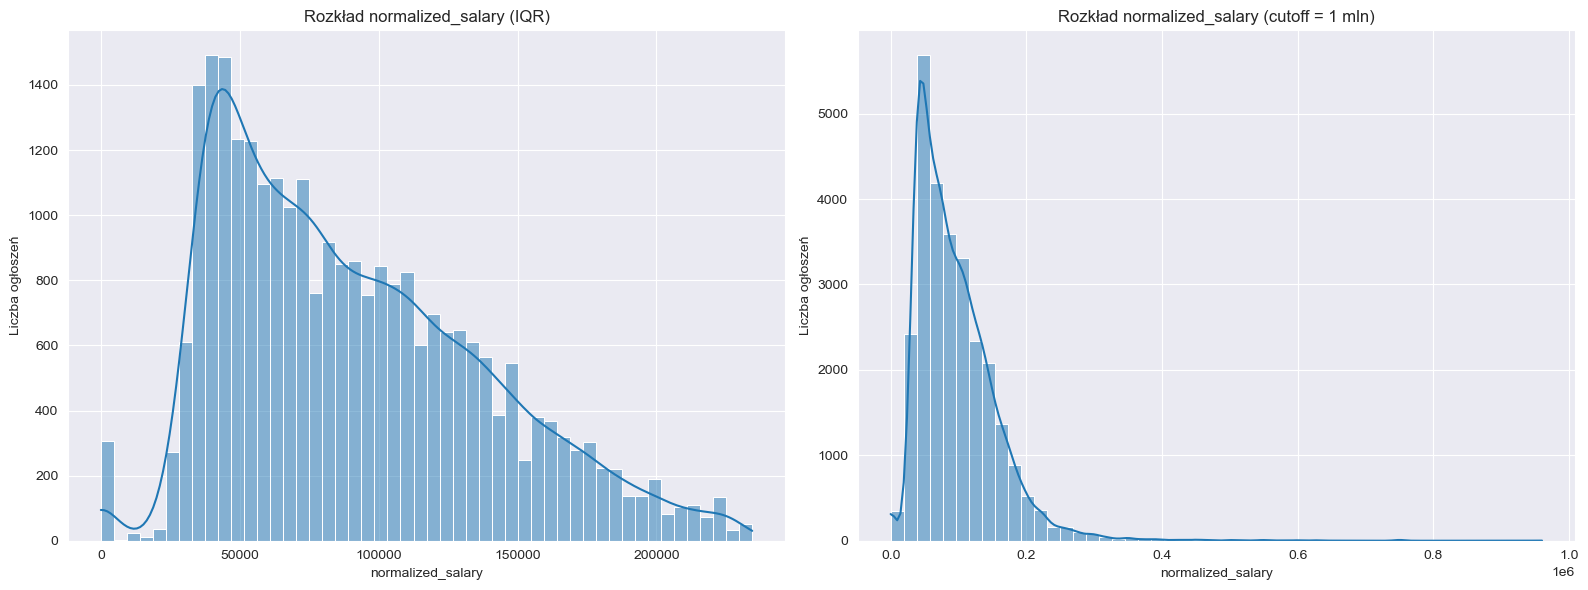

In [366]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# IQR
sns.histplot(postings_iqr['normalized_salary'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('Rozkład normalized_salary (IQR)')
axs[0].set_xlabel('normalized_salary')
axs[0].set_ylabel('Liczba ogłoszeń')

# Arbitralny cutoff
sns.histplot(postings_cutoff['normalized_salary'], bins=50, kde=True, ax=axs[1])
axs[1].set_title('Rozkład normalized_salary (cutoff = 1 mln)')
axs[1].set_xlabel('normalized_salary')
axs[1].set_ylabel('Liczba ogłoszeń')

plt.tight_layout()
plt.show()


Porównanie podstawowych statystyk:

In [367]:
print("STATYSTYKI IQR")
print(postings_iqr['normalized_salary'].describe())

print("\nSTATYSTYKI CUTOFF")
print(postings_cutoff['normalized_salary'].describe())

STATYSTYKI IQR
count     27136.000000
mean      90488.670913
std       47527.179490
min           0.000000
25%       51000.000000
50%       80449.200000
75%      121945.200000
max      234500.000000
Name: normalized_salary, dtype: float64

STATYSTYKI CUTOFF
count     27809.000000
mean      95944.619856
std       60622.202842
min           0.000000
25%       52000.000000
50%       82500.000000
75%      125000.000000
max      960000.000000
Name: normalized_salary, dtype: float64




Kilka informacji po czyszczeniu:

In [368]:
print("Rozmiar danych PO CZYSZCZENIU:")
print(f"Liczba ofert: {len(postings_iqr)}")
print(f"Liczba kolumn: {postings_iqr.shape[1]}")
print(f"Liczba braków (po czyszczeniu): \n{postings_iqr.isna().sum().sort_values(ascending=False).head(10)}")

Rozmiar danych PO CZYSZCZENIU:
Liczba ofert: 27136
Liczba kolumn: 21
Liczba braków (po czyszczeniu): 
remote_allowed                 23618
job_id                             0
work_type_INTERNSHIP               0
experience_level_Internship        0
experience_level_Executive         0
experience_level_Entry             0
experience_level_Director          0
work_type_VOLUNTEER                0
work_type_TEMPORARY                0
work_type_PART_TIME                0
dtype: int64


Tymczasowe pokazanie kilku pierwszych wierszy wyczyszczonego wstępnie zbioru:

In [369]:
postings_iqr.head(10)

,job_id,company_name,title,pay_period,location,company_id,remote_allowed,application_type,normalized_salary,remote_flag,...,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,work_type_TEMPORARY,work_type_VOLUNTEER,experience_level_Director,experience_level_Entry,experience_level_Executive,experience_level_Internship,experience_level_Mid-Senior
85,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS",HOURLY,"Foster City, CA",2610793.0,NaN,ComplexOnsiteApply,135200.0,0,...,False,False,False,False,False,False,False,False,False,True
101,2989631782,ActOne Group,Administrative Assistant - CONCUR,YEARLY,"New York, NY",3496915.0,NaN,ComplexOnsiteApply,82500.0,0,...,False,False,False,False,False,False,False,False,False,False
109,3177010992,ABC Farigua Division,Customer Service Representative,YEARLY,"Greater Orlando, FL",72313277.0,NaN,ComplexOnsiteApply,90000.0,0,...,False,False,False,False,False,False,True,False,False,False
169,3550388220,TECHEAD,Inbound Call Center Specialist,HOURLY,"Richmond, VA",33605.0,NaN,ComplexOnsiteApply,38480.0,0,...,False,False,False,False,False,False,False,False,False,False
194,3614817348,Prolink,Tool and Die Maker,HOURLY,Cincinnati Metropolitan Area,2447993.0,NaN,ComplexOnsiteApply,69680.0,0,...,False,False,False,False,False,False,False,False,False,False
195,3619548798,"Dexterity, Inc.",Senior Mechanical Engineer,YEARLY,"Redwood City, CA",28173564.0,NaN,OffsiteApply,170000.0,0,...,False,False,False,False,False,False,False,False,False,True
198,3627141928,Staff Management | SMX,Quality Engineer,HOURLY,"New Albany, IN",14336.0,NaN,ComplexOnsiteApply,73840.0,0,...,False,False,False,False,False,False,False,False,False,False
221,3681437990,Ascendion,Quality Assurance Specialist,YEARLY,"Seattle, WA",86694680.0,NaN,OffsiteApply,66000.0,0,...,False,False,False,False,False,False,False,False,False,False
244,3704190127,Premier Brands Group Holdings,"Technical Designer, Womans Denim Bottoms",YEARLY,New York City Metropolitan Area,80318658.0,NaN,SimpleOnsiteApply,85000.0,0,...,False,False,False,False,False,False,False,False,False,True
373,3803052628,Insight Global,Flight Software Engineer,YEARLY,"Webster, TX",11056.0,NaN,ComplexOnsiteApply,155000.0,0,...,False,False,False,False,False,False,False,False,False,True


Sprawdzenie location:

In [370]:
# Policzmy długość location – 2 przecinki = city, state, country (czyli 3 pola); 1 przecinek = city, state; brak przecinka = tylko kraj

postings_iqr['location_comma_count'] = postings_iqr['location'].str.count(',')

# Rekordy tylko z krajem (np. "United States")
only_country = postings_iqr[postings_iqr['location_comma_count'] == 0]
print(f"Liczba rekordów z samym krajem: {len(only_country)}")

# Rekordy z City, ST (1 przecinek)
city_state = postings_iqr[postings_iqr['location_comma_count'] == 1]
print(f"Liczba rekordów z miastem i stanem: {len(city_state)}")

# Rekordy z City, ST, Country (2 przecinki)
full_location = postings_iqr[postings_iqr['location_comma_count'] == 2]
print(f"Liczba rekordów z pełną lokalizacją: {len(full_location)}")

Liczba rekordów z samym krajem: 3285
Liczba rekordów z miastem i stanem: 23680
Liczba rekordów z pełną lokalizacją: 171


In [371]:
# Rekordy, gdzie location to tylko kraj (brak przecinka)
only_country = postings_iqr[postings_iqr['location'].str.count(',') == 0]

# Wyświetlenie unikalnych wartości
print("Unikalne wartości 'location' dla rekordów zawierających tylko kraj:")
print(only_country['location'].value_counts())

Unikalne wartości 'location' dla rekordów zawierających tylko kraj:
location
United States                      1892
New York City Metropolitan Area     357
Los Angeles Metropolitan Area       115
San Francisco Bay Area              100
Dallas-Fort Worth Metroplex          72
                                   ... 
Maui                                  1
Lawton Area                           1
South Bend-Mishawaka Region           1
Baton Rouge Metropolitan Area         1
Greater McAllen Area                  1
Name: count, Length: 102, dtype: int64


Na ten moment location zostaje takie jakie jest, ponieważ rozdzielenie i odpowiednie przypisanie brakującego stanu czy kraju, może być przeprowadzone bardzo niefeketwynie, a nie zrobić większej różnicy. I tak dane pochodzą z USA i najważniejsze jest miasto, a w danych są podane miasta albo obszary metropolitanskie danego miasta.

Dodatkowe sprawdzenie/podsumowanie:

In [372]:
postings_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27136 entries, 85 to 123848
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   job_id                       27136 non-null  int64  
 1   company_name                 27136 non-null  object 
 2   title                        27136 non-null  object 
 3   pay_period                   27136 non-null  object 
 4   location                     27136 non-null  object 
 5   company_id                   27136 non-null  float64
 6   remote_allowed               3518 non-null   float64
 7   application_type             27136 non-null  object 
 8   normalized_salary            27136 non-null  float64
 9   remote_flag                  27136 non-null  int32  
 10  work_type_FULL_TIME          27136 non-null  bool   
 11  work_type_INTERNSHIP         27136 non-null  bool   
 12  work_type_OTHER              27136 non-null  bool   
 13  work_type_PART_TIME

In [373]:
print(postings_iqr.columns.tolist())

['job_id', 'company_name', 'title', 'pay_period', 'location', 'company_id', 'remote_allowed', 'application_type', 'normalized_salary', 'remote_flag', 'work_type_FULL_TIME', 'work_type_INTERNSHIP', 'work_type_OTHER', 'work_type_PART_TIME', 'work_type_TEMPORARY', 'work_type_VOLUNTEER', 'experience_level_Director', 'experience_level_Entry', 'experience_level_Executive', 'experience_level_Internship', 'experience_level_Mid-Senior', 'location_comma_count']


Usunięcie zbędnych kolumn:

In [374]:
postings_iqr.drop(columns=['remote_allowed', 'location_comma_count'], inplace=True)

In [375]:
postings_iqr.head(15)

,job_id,company_name,title,pay_period,location,company_id,application_type,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,work_type_TEMPORARY,work_type_VOLUNTEER,experience_level_Director,experience_level_Entry,experience_level_Executive,experience_level_Internship,experience_level_Mid-Senior
85,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS",HOURLY,"Foster City, CA",2610793.0,ComplexOnsiteApply,135200.0,0,False,False,False,False,False,False,False,False,False,False,True
101,2989631782,ActOne Group,Administrative Assistant - CONCUR,YEARLY,"New York, NY",3496915.0,ComplexOnsiteApply,82500.0,0,True,False,False,False,False,False,False,False,False,False,False
109,3177010992,ABC Farigua Division,Customer Service Representative,YEARLY,"Greater Orlando, FL",72313277.0,ComplexOnsiteApply,90000.0,0,True,False,False,False,False,False,False,True,False,False,False
169,3550388220,TECHEAD,Inbound Call Center Specialist,HOURLY,"Richmond, VA",33605.0,ComplexOnsiteApply,38480.0,0,False,False,False,False,False,False,False,False,False,False,False
194,3614817348,Prolink,Tool and Die Maker,HOURLY,Cincinnati Metropolitan Area,2447993.0,ComplexOnsiteApply,69680.0,0,True,False,False,False,False,False,False,False,False,False,False
195,3619548798,"Dexterity, Inc.",Senior Mechanical Engineer,YEARLY,"Redwood City, CA",28173564.0,OffsiteApply,170000.0,0,True,False,False,False,False,False,False,False,False,False,True
198,3627141928,Staff Management | SMX,Quality Engineer,HOURLY,"New Albany, IN",14336.0,ComplexOnsiteApply,73840.0,0,True,False,False,False,False,False,False,False,False,False,False
221,3681437990,Ascendion,Quality Assurance Specialist,YEARLY,"Seattle, WA",86694680.0,OffsiteApply,66000.0,0,True,False,False,False,False,False,False,False,False,False,False
244,3704190127,Premier Brands Group Holdings,"Technical Designer, Womans Denim Bottoms",YEARLY,New York City Metropolitan Area,80318658.0,SimpleOnsiteApply,85000.0,0,True,False,False,False,False,False,False,False,False,False,True
373,3803052628,Insight Global,Flight Software Engineer,YEARLY,"Webster, TX",11056.0,ComplexOnsiteApply,155000.0,0,True,False,False,False,False,False,False,False,False,False,True


Sprawdzenie czy application_type ma związek z płacą, w tym celu sprawdzę średnie wynagrodzenie dla każdej kategorii:

In [376]:
postings_iqr.groupby('application_type')['normalized_salary'].mean().sort_values(ascending=False)

application_type
UnknownApply          121850.000000
ComplexOnsiteApply     99674.729822
SimpleOnsiteApply      94103.885855
OffsiteApply           85380.871457
Name: normalized_salary, dtype: float64

Różnice są niewielkie, dlatego decyduję się na usunięcie kolumny, ponieważ nie będzie ona oddziaływać na płacę w znacznym stopniu.

In [377]:
postings_iqr.drop(columns=['application_type'], inplace=True)

Dane po wyczyszczeniu:

In [378]:
postings_iqr.head(15)

,job_id,company_name,title,pay_period,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,work_type_TEMPORARY,work_type_VOLUNTEER,experience_level_Director,experience_level_Entry,experience_level_Executive,experience_level_Internship,experience_level_Mid-Senior
85,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS",HOURLY,"Foster City, CA",2610793.0,135200.0,0,False,False,False,False,False,False,False,False,False,False,True
101,2989631782,ActOne Group,Administrative Assistant - CONCUR,YEARLY,"New York, NY",3496915.0,82500.0,0,True,False,False,False,False,False,False,False,False,False,False
109,3177010992,ABC Farigua Division,Customer Service Representative,YEARLY,"Greater Orlando, FL",72313277.0,90000.0,0,True,False,False,False,False,False,False,True,False,False,False
169,3550388220,TECHEAD,Inbound Call Center Specialist,HOURLY,"Richmond, VA",33605.0,38480.0,0,False,False,False,False,False,False,False,False,False,False,False
194,3614817348,Prolink,Tool and Die Maker,HOURLY,Cincinnati Metropolitan Area,2447993.0,69680.0,0,True,False,False,False,False,False,False,False,False,False,False
195,3619548798,"Dexterity, Inc.",Senior Mechanical Engineer,YEARLY,"Redwood City, CA",28173564.0,170000.0,0,True,False,False,False,False,False,False,False,False,False,True
198,3627141928,Staff Management | SMX,Quality Engineer,HOURLY,"New Albany, IN",14336.0,73840.0,0,True,False,False,False,False,False,False,False,False,False,False
221,3681437990,Ascendion,Quality Assurance Specialist,YEARLY,"Seattle, WA",86694680.0,66000.0,0,True,False,False,False,False,False,False,False,False,False,False
244,3704190127,Premier Brands Group Holdings,"Technical Designer, Womans Denim Bottoms",YEARLY,New York City Metropolitan Area,80318658.0,85000.0,0,True,False,False,False,False,False,False,False,False,False,True
373,3803052628,Insight Global,Flight Software Engineer,YEARLY,"Webster, TX",11056.0,155000.0,0,True,False,False,False,False,False,False,False,False,False,True


## Dodatkowe dane:

In [379]:
print(employee_counts.head(3))

   company_id  employee_count  follower_count  time_recorded
0      391906             186           32508     1712346173
1    22292832             311            4471     1712346173
2       20300            1053            6554     1712346173


In [380]:
print(employee_counts['employee_count'].describe())

count     35787.000000
mean       6715.874256
std       29400.984643
min           0.000000
25%          56.000000
50%         418.000000
75%        2945.000000
max      751125.000000
Name: employee_count, dtype: float64


In [381]:
employee_counts['time_recorded'].value_counts()

time_recorded
1713550029    49
1713467554    47
1713458509    46
1713458777    45
1713557052    42
              ..
1713489951     1
1712654669     1
1712902749     1
1712860908     1
1712460745     1
Name: count, Length: 3531, dtype: int64

In [382]:
pd.to_datetime(employee_counts['time_recorded'], unit='s').sort_values().unique()

<DatetimeArray>
['2024-04-05 19:42:53', '2024-04-05 19:44:08', '2024-04-05 19:45:23',
 '2024-04-05 19:46:37', '2024-04-05 19:47:52', '2024-04-05 19:49:06',
 '2024-04-05 19:50:21', '2024-04-05 19:51:35', '2024-04-05 19:52:49',
 '2024-04-05 19:54:03',
 ...
 '2024-04-20 00:01:25', '2024-04-20 00:04:26', '2024-04-20 00:07:44',
 '2024-04-20 00:11:19', '2024-04-20 00:14:32', '2024-04-20 00:18:41',
 '2024-04-20 00:20:27', '2024-04-20 00:23:46', '2024-04-20 00:23:47',
 '2024-04-20 00:27:39']
Length: 3531, dtype: datetime64[ns]

Dodanie liczby pracowników employee_counts+company_id

In [383]:
# wybranie najnowszych danych dla każdej firmy
latest_employees = employee_counts.sort_values('time_recorded').drop_duplicates('company_id', keep='last')

# dołączenie employee_count do postings_merged
postings_merged = postings_iqr.merge(latest_employees[['company_id', 'employee_count']], on='company_id', how='left')

def categorize_size(n):
    if pd.isna(n):
        return 'unknown'
    elif n < 50:
        return 'micro'
    elif n < 250:
        return 'small'
    elif n < 1000:
        return 'medium'
    else:
        return 'large'

postings_merged['company_size_cat'] = postings_merged['employee_count'].apply(categorize_size)

# kodowanie kategorii
postings_merged = pd.get_dummies(postings_merged, columns=['company_size_cat'], prefix='size')

Sprawdzenie co z tego wyszło:

In [384]:
postings_merged.head(10)

,job_id,company_name,title,pay_period,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,...,experience_level_Director,experience_level_Entry,experience_level_Executive,experience_level_Internship,experience_level_Mid-Senior,employee_count,size_large,size_medium,size_micro,size_small
0,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS",HOURLY,"Foster City, CA",2610793.0,135200.0,0,False,False,...,False,False,False,False,True,85,False,False,False,True
1,2989631782,ActOne Group,Administrative Assistant - CONCUR,YEARLY,"New York, NY",3496915.0,82500.0,0,True,False,...,False,False,False,False,False,141,False,False,False,True
2,3177010992,ABC Farigua Division,Customer Service Representative,YEARLY,"Greater Orlando, FL",72313277.0,90000.0,0,True,False,...,False,True,False,False,False,1,False,False,True,False
3,3550388220,TECHEAD,Inbound Call Center Specialist,HOURLY,"Richmond, VA",33605.0,38480.0,0,False,False,...,False,False,False,False,False,81,False,False,False,True
4,3614817348,Prolink,Tool and Die Maker,HOURLY,Cincinnati Metropolitan Area,2447993.0,69680.0,0,True,False,...,False,False,False,False,False,2166,True,False,False,False
5,3619548798,"Dexterity, Inc.",Senior Mechanical Engineer,YEARLY,"Redwood City, CA",28173564.0,170000.0,0,True,False,...,False,False,False,False,True,224,False,False,False,True
6,3627141928,Staff Management | SMX,Quality Engineer,HOURLY,"New Albany, IN",14336.0,73840.0,0,True,False,...,False,False,False,False,False,2718,True,False,False,False
7,3681437990,Ascendion,Quality Assurance Specialist,YEARLY,"Seattle, WA",86694680.0,66000.0,0,True,False,...,False,False,False,False,False,2548,True,False,False,False
8,3704190127,Premier Brands Group Holdings,"Technical Designer, Womans Denim Bottoms",YEARLY,New York City Metropolitan Area,80318658.0,85000.0,0,True,False,...,False,False,False,False,True,335,False,True,False,False
9,3803052628,Insight Global,Flight Software Engineer,YEARLY,"Webster, TX",11056.0,155000.0,0,True,False,...,False,False,False,False,True,14128,True,False,False,False


In [385]:
postings_merged.shape

(27136, 24)

In [386]:
print(postings_merged.columns.tolist())

['job_id', 'company_name', 'title', 'pay_period', 'location', 'company_id', 'normalized_salary', 'remote_flag', 'work_type_FULL_TIME', 'work_type_INTERNSHIP', 'work_type_OTHER', 'work_type_PART_TIME', 'work_type_TEMPORARY', 'work_type_VOLUNTEER', 'experience_level_Director', 'experience_level_Entry', 'experience_level_Executive', 'experience_level_Internship', 'experience_level_Mid-Senior', 'employee_count', 'size_large', 'size_medium', 'size_micro', 'size_small']


In [387]:
postings_merged.sample(5)

,job_id,company_name,title,pay_period,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,...,experience_level_Director,experience_level_Entry,experience_level_Executive,experience_level_Internship,experience_level_Mid-Senior,employee_count,size_large,size_medium,size_micro,size_small
22036,3905203975,SP+ (SP Plus),Valet,HOURLY,"Portland, OR",166127.0,37440.0,0,True,False,...,False,True,False,False,False,5692,True,False,False,False
17098,3903811223,Unilever,"Category Manager, Ice Cream - OOH/Dcom",YEARLY,"Englewood Cliffs, NJ",1248.0,122900.0,1,True,False,...,False,False,False,False,True,117423,True,False,False,False
19845,3904427394,BluSky Restoration Contractors,Construction Project Director,YEARLY,"Centennial, CO",947908.0,135000.0,0,True,False,...,True,False,False,False,False,1050,True,False,False,False
17550,3903835679,Washington University in St. Louis,Salesforce Report Writer (ARCH Program) - Univ...,YEARLY,"Clayton, MO",4608.0,87600.0,0,True,False,...,False,True,False,False,False,16299,True,False,False,False
21418,3904959875,The Fountain Group,Animal Care Technician,HOURLY,"Carlsbad, CA",65647.0,47840.0,0,False,False,...,False,True,False,False,False,355,False,True,False,False


Dodatkowe poprawki:

In [388]:
postings_merged = postings_merged.drop(columns=['company_name']).copy()

In [389]:
pay_period_dummies = pd.get_dummies(postings_merged['pay_period'], prefix='pay_period')
postings_merged = pd.concat([postings_merged.drop(columns=['pay_period']), pay_period_dummies], axis=1).copy()

In [390]:
bool_cols = postings_merged.select_dtypes(include='bool').columns
postings_merged[bool_cols] = postings_merged[bool_cols].astype(int)

In [391]:
postings_merged.sample(5)

,job_id,title,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,...,employee_count,size_large,size_medium,size_micro,size_small,pay_period_BIWEEKLY,pay_period_HOURLY,pay_period_MONTHLY,pay_period_WEEKLY,pay_period_YEARLY
22494,3905250403,Part Time Sales Associate- CALVIN KLEIN,"Tulalip, WA",162866.0,38459.2,0,0,0,0,1,...,7483,1,0,0,0,0,1,0,0,0
18172,3903896632,L&D Travel RN - Job Id: JO03721431,"Clovis, CA",1506196.0,31332.0,0,1,0,0,0,...,242,0,0,0,1,0,0,1,0,0
8323,3898171948,Accounting Manager,"Charleston, WV",49648345.0,72500.0,0,1,0,0,0,...,140,0,0,0,1,0,0,0,0,1
26281,3906227468,Air Export Agent,"Middleburg Heights, OH",23656.0,39520.0,0,1,0,0,0,...,621,0,1,0,0,0,1,0,0,0
8475,3898177261,"Support Manager, Family Navigator","Annapolis, MD",2744779.0,55000.0,0,1,0,0,0,...,216,0,0,0,1,0,0,0,0,1


In [392]:
postings_merged.shape

(27136, 27)

Zapisanie do pliku csv, zeby nie powtarzac wszystkich kroków od początku:

In [393]:
postings_merged.to_csv("postings_cleaned_and_merged.csv", index=False)

In [394]:
postings_merged = pd.read_csv("postings_cleaned_and_merged.csv")

Kwestia lokalizacji:

In [395]:
unique_locations = postings_merged['location'].nunique()
print(f"Liczba unikalnych lokalizacji: {unique_locations}")

Liczba unikalnych lokalizacji: 3910


Tu chyba wlasciwy blok kodu ktory zalatwia cala kwestie z lokalizacja:

In [396]:
# Zakładamy, że masz postings_merged i że remote_flag już istnieje

# 1. Zliczamy przecinki
postings_merged['comma_count'] = postings_merged['location'].str.count(',')

# 2. Ustawiamy "remote" dla lokalizacji z 0 lub 2 przecinkami, ale gdzie można pracować zdalnie
postings_merged.loc[
    ((postings_merged['comma_count'] != 1) & (postings_merged['remote_flag'] == 1)),
    'location'
] = 'remote'

# 3. Usuwamy:
#    - lokalizacje z 2 przecinkami i remote_flag == 0
#    - lokalizacje z 0 przecinkami i remote_flag == 0, ale które nie są w wybranej liście "keep"

# Lista lokalizacji, które mimo braku przecinka chcemy zachować i ręcznie mapować
keep_no_comma_locs = [
    'San Francisco Bay Area',
    'New York City Metropolitan Area',
    'Los Angeles Metropolitan Area',
    'Greater Chicago Area',
    'Washington DC-Baltimore Area',
    'Atlanta Metropolitan Area',
    'Greater Boston',
    'Greater St. Louis',
    'Greater Seattle Area'
]

# Filtrowanie datasetu
postings_filtered = postings_merged[~(
        ((postings_merged['comma_count'] == 2) & (postings_merged['remote_flag'] == 0)) |
        ((postings_merged['comma_count'] == 0) &
         (postings_merged['remote_flag'] == 0) &
         (~postings_merged['location'].isin(keep_no_comma_locs)))
)].copy()

# 4. Mapowanie "obszarów" na City, ST
area_to_city_state = {
    'San Francisco Bay Area': 'San Francisco, CA',
    'New York City Metropolitan Area': 'New York, NY',
    'Los Angeles Metropolitan Area': 'Los Angeles, CA',
    'Greater Chicago Area': 'Chicago, IL',
    'Washington DC-Baltimore Area': 'Washington, DC',
    'Atlanta Metropolitan Area': 'Atlanta, GA',
    'Greater Boston': 'Boston, MA',
    'Greater St. Louis': 'St. Louis, MO',
    'Greater Seattle Area': 'Seattle, WA'
}
postings_filtered['location'] = postings_filtered['location'].replace(area_to_city_state)

# 5. Ostateczna walidacja – zostawiamy tylko lokalizacje z dokładnie 1 przecinkiem lub "remote"
postings_filtered['comma_count'] = postings_filtered['location'].str.count(',')
postings_final = postings_filtered[
    (postings_filtered['comma_count'] == 1) | (postings_filtered['location'] == 'remote')
    ].copy()

# Usuwamy pomocniczą kolumnę comma_count
postings_final.drop(columns='comma_count', inplace=True)

In [398]:
# 30 losowych lokalizacji
print(postings_final['location'].dropna().sample(30, random_state=42).values)

# 10 losowych rekordów
postings_final.sample(10, random_state=42)

['Oklahoma City, OK' 'Philadelphia, PA' 'Des Moines, IA' 'Orlando, FL'
 'New York, NY' 'Austin, TX' 'Fairfax County, VA' 'Indiana, United States'
 'California, United States' 'Sacramento County, CA' 'New York, NY'
 'remote' 'Grimes, IA' 'Post Falls, ID' 'remote' 'San Francisco, CA'
 'Illinois, United States' 'Milwaukee, WI' 'Germantown, TN'
 'Port Chester, NY' 'Old Fort, NC' 'Pasadena, TX'
 'Greater Birmingham, Alabama Area' 'remote' 'Covina, CA' 'Round Lake, IL'
 'Texas, United States' 'Washington, DC' 'Seattle, WA' 'remote']


,job_id,title,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,...,employee_count,size_large,size_medium,size_micro,size_small,pay_period_BIWEEKLY,pay_period_HOURLY,pay_period_MONTHLY,pay_period_WEEKLY,pay_period_YEARLY
2568,3887702206,Innovation Coordinator,"Oklahoma City, OK",40783.0,58500.000,0,0,0,0,0,...,206,0,0,0,1,0,0,0,0,1
11382,3901616977,Clerk Typist - PCA Care Connections,"Philadelphia, PA",37862.0,30821.975,0,1,0,0,0,...,929,0,1,0,0,0,0,0,0,1
19126,3904386588,Solution Architect (Remote),"Des Moines, IA",1680.0,120000.000,1,1,0,0,0,...,313972,1,0,0,0,0,0,0,0,1
5113,3891077259,Paralegal,"Orlando, FL",6088.0,65000.000,0,1,0,0,0,...,5099,1,0,0,0,0,0,0,0,1
7327,3895550373,Enterprise Payments Data Analytics Business An...,"New York, NY",1235.0,151350.000,0,1,0,0,0,...,194312,1,0,0,0,0,0,0,0,1
12667,3901949010,Conflicts Attorney,"Austin, TX",29104.0,160000.000,0,1,0,0,0,...,416,0,1,0,0,0,0,0,0,1
8769,3899529161,Lead Data Analyst,"Fairfax County, VA",10333877.0,156000.000,0,0,0,0,0,...,28,0,0,1,0,0,1,0,0,0
2195,3887106121,Business Development Manager,"Indiana, United States",11056.0,125000.000,0,1,0,0,0,...,14128,1,0,0,0,0,0,0,0,1
5242,3891083166,Test Analyst-79340,"California, United States",731128.0,109200.000,1,0,0,0,0,...,239,0,0,0,1,0,1,0,0,0
354,3884442267,INFORMATION TECHNOLOGY SPECIALIST II,"Sacramento County, CA",787339.0,114138.000,0,1,0,0,0,...,3240,1,0,0,0,0,0,1,0,0


## Tu testowanie:

In [280]:
# Usuń zbędne frazy
postings_merged['location_cleaned'] = (
    postings_merged['location']
    .str.replace('Metropolitan Area', '', regex=False)
    .str.strip()
)

In [281]:
# Rekordy z lokalizacją jako USA
us_only = postings_merged[postings_merged['location'].str.strip() == 'United States']

# Podział na remote / nie remote
print("Z remote_flag == 1:", len(us_only[us_only['remote_flag'] == 1]))
print("Z remote_flag == 0:", len(us_only[us_only['remote_flag'] == 0]))

Z remote_flag == 1: 1859
Z remote_flag == 0: 33


In [282]:
location_df = pd.DataFrame(postings_merged['location_cleaned'].unique(), columns=['location'])
print("Unikalnych po czyszczeniu:", location_df.shape[0])

Unikalnych po czyszczeniu: 3910


In [283]:
area_locations = postings_merged[postings_merged['location'].str.contains("Area", case=False, na=False)]
top_area_locs = area_locations['location'].value_counts().head(55)
print(top_area_locs)

location
New York City Metropolitan Area                         357
Los Angeles Metropolitan Area                           115
San Francisco Bay Area                                  100
Austin, Texas Metropolitan Area                          58
Washington DC-Baltimore Area                             56
Atlanta Metropolitan Area                                53
Greater Chicago Area                                     42
Denver Metropolitan Area                                 42
Columbus, Ohio Metropolitan Area                         32
Portland, Oregon Metropolitan Area                       30
Greater Minneapolis-St. Paul Area                        24
Greater Seattle Area                                     23
Salt Lake City Metropolitan Area                         21
Miami-Fort Lauderdale Area                               20
Detroit Metropolitan Area                                20
Raleigh-Durham-Chapel Hill Area                          18
San Antonio, Texas Metropolitan

In [284]:
location_df.sample(30)

,location
3113,"Sun Prairie Town, WI"
600,"Cokato, MN"
3238,"Lawrence, IN"
1051,"Manzanita, OR"
759,"Hauppauge, NY"
511,"Lexington, SC"
2860,"Dauphin County, PA"
2012,"Glen Allen, VA"
1737,"Lake Mary, FL"
735,"Clinton, CT"


In [285]:
import re

def clean_location(loc):
    loc = re.sub(r"(Metropolitan Area|Area|Greater|Region)", "", loc, flags=re.IGNORECASE)
    loc = loc.replace("--", "-")  # usuwanie podwójnych myślników
    loc = loc.replace("-", ",")   # zamiana myślnika na przecinek (np. "Los Angeles-San Diego" → "Los Angeles, San Diego")
    loc = re.sub(r"\s*,\s*", ", ", loc)  # porządkujemy przecinki
    loc = re.sub(r"\s+", " ", loc)  # usuwa wielokrotne spacje
    return loc.strip()

postings_merged['location_clean'] = postings_merged['location'].apply(clean_location)

# Jeszcze raz sprawdźmy:
print(f"Po czyszczeniu mamy unikalnych lokalizacji: {postings_merged['location_clean'].nunique()}")

Po czyszczeniu mamy unikalnych lokalizacji: 3902


In [286]:
# Usuwamy 33 niepotrzebne wiersze
postings_merged = postings_merged[~((postings_merged['location'] == "United States") & (postings_merged['remote_flag'] == 0))]

# Zmieniamy nazwę
postings_merged.loc[postings_merged['location'] == "United States", 'location_clean'] = "Remote - United States"

In [287]:
print(f"Po czyszczeniu mamy unikalnych lokalizacji: {postings_merged['location_clean'].nunique()}")

Po czyszczeniu mamy unikalnych lokalizacji: 3902


In [288]:
# Ile rekordów nadal ma 'United States' i remote_flag == 0?
mask_us_non_remote = (postings_merged['location'].str.strip() == 'United States') & (postings_merged['remote_flag'] == 0)
print("Pozostałe rekordy United States + remote_flag == 0:", mask_us_non_remote.sum())


Pozostałe rekordy United States + remote_flag == 0: 0


In [290]:
location_df.sample(50)

,location
1770,"Elkhorn, WI"
3104,"Gordonsville, TN"
2537,"Dublin, GA"
2673,"Shady Dale, GA"
1022,"Fly-In Acres, CA"
2510,"Washougal, WA"
528,"Phenix City, AL"
3103,"Vega, TX"
2476,"Port Angeles, WA"
738,"Newark, CA"


In [291]:
# Filtrujemy lokalizacje zawierające zarówno 'area' jak i przecinek
problematic = location_df[location_df['location'].str.lower().str.contains('area') & location_df['location'].str.contains(',')]
print(problematic.shape[0])
print(problematic.head(20))

11
                                               location
85                     Greater Birmingham, Alabama Area
586                            Greater Jackson, MI Area
739                   Kansas City metropolitan area, KS
844             Hilton Head Island, South Carolina Area
1668                      Phoenix metropolitan area, AZ
2227                   Birmingham metropolitan area, AL
2664                Oklahoma City metropolitan area, OK
2716                      Memphis metropolitan area, MS
2917  Greenville-Spartanburg-Anderson, South Carolin...
3561                       Greater Albany, Georgia Area
3746                   Cincinnati metropolitan area, OH


In [295]:
import re

def clean_metro_area(loc):
    # Jeżeli jest "metropolitan area, ST" → zostaw tylko "Miasto, ST"
    loc = re.sub(r'\s*[Mm]etropolitan [Aa]rea,?\s*([A-Z]{2})', r', \1', loc)
    # Jeżeli jest "Area" na końcu (np. "Greater Birmingham, Alabama Area") → usuń "Area"
    loc = re.sub(r'\s+[Aa]rea$', '', loc)
    return loc.strip()

# Zastosujmy na całej kolumnie
location_df['location'] = location_df['location'].apply(clean_metro_area)


In [299]:
location_df.sample(50)

,location
1923,"Dows, IA"
3132,"Fox Crossing, WI"
1977,"Chino Hills, CA"
3528,"Dominguez, CA"
2270,"Rockledge, FL"
1466,"Jackson, NJ"
619,"Conley, GA"
1692,"Peachtree Corners, GA"
3562,"Cameron Park, CA"
1961,"Belton, MO"


In [300]:
# Policz przecinki w każdej lokalizacji
location_df['comma_count'] = location_df['location'].str.count(',')

# Podsumuj, ile lokalizacji ma ile przecinków
print(location_df['comma_count'].value_counts())

comma_count
1    3762
0     102
2      46
Name: count, dtype: int64


In [303]:
location_df[location_df['comma_count'] == 2].head(46)

,location,comma_count
10,"Los Angeles, California, United States",2
326,"Aurora, Colorado, United States",2
525,"New York, New York, United States",2
682,"Northridge, California, United States",2
741,"Austin, Texas, United States",2
995,"La Jolla, California, United States",2
1047,"San Francisco, California, United States",2
1150,"Queens, New York, United States",2
1424,"San Diego, California, United States",2
1671,"Long Beach, California, United States",2


In [302]:
print("Liczba lokalizacji z dwoma przecinkami:", len(location_df[location_df['comma_count'] == 2]))

Liczba lokalizacji z dwoma przecinkami: 46


In [304]:
location_df[location_df['comma_count'] == 0].head(102)

,location,comma_count
4,Cincinnati,0
8,New York City,0
12,United States,0
25,Greater Sacramento,0
43,Los Angeles,0
...,...,...
3504,Walla Walla,0
3570,Cape Coral,0
3736,Greater Eugene-Springfield,0
3739,Boise,0


In [305]:
location_df[location_df['comma_count'] == 0].sample(15)

,location,comma_count
2800,Greater San Luis Obispo,0
3486,Johnson City-Kingsport-Bristol,0
1035,Louisville,0
210,Greater Boston,0
12,United States,0
401,Omaha,0
3570,Cape Coral,0
2046,Tallahassee,0
2082,Memphis,0
787,Greater Phoenix,0


In [306]:
# Zliczamy ile jest wierszy z 0 i 2 przecinkami i jaka jest wartość remote_flag
for count in [0, 2]:
    subset = postings_merged[postings_merged['location'].str.count(',') == count]
    remote_0 = subset[subset['remote_flag'] == 0].shape[0]
    remote_1 = subset[subset['remote_flag'] == 1].shape[0]
    print(f"comma_count = {count} → remote_flag == 0: {remote_0} | remote_flag == 1: {remote_1}")

comma_count = 0 → remote_flag == 0: 1272 | remote_flag == 1: 1980
comma_count = 2 → remote_flag == 0: 168 | remote_flag == 1: 3


In [307]:
# Usuwamy wiersze z 0 lub 2 przecinkami, które nie są remote
postings_merged = postings_merged[~(
        ((postings_merged['location'].str.count(',') == 0) & (postings_merged['remote_flag'] == 0)) |
        ((postings_merged['location'].str.count(',') == 2) & (postings_merged['remote_flag'] == 0))
)]

In [309]:
postings_merged['location'].str.count(',').value_counts()

location
1    23680
0     1980
2        3
Name: count, dtype: int64

In [310]:
postings_merged[postings_merged['location'].str.count(',') == 2]['location'].unique()

array(['Riverbank, California, United States',
       'Wilmington, Delaware, United States',
       'Los Angeles, California, United States'], dtype=object)

In [311]:
postings_merged[postings_merged['location'].str.count(',') == 0]['location'].dropna().unique()[:30]

array(['United States', 'Raleigh-Durham-Chapel Hill Area',
       'Washington DC-Baltimore Area', 'San Francisco Bay Area',
       'Greater Hartford', 'New York City Metropolitan Area',
       'Detroit Metropolitan Area', 'Greater Philadelphia',
       'Greater St. Louis', 'Greater Syracuse-Auburn Area',
       'Greater Chicago Area', 'Greater Minneapolis-St. Paul Area',
       'Los Angeles Metropolitan Area', 'Atlanta Metropolitan Area',
       'Greater Seattle Area', 'Greater Indianapolis', 'Greater Boston',
       'Nashville Metropolitan Area', 'Dallas-Fort Worth Metroplex',
       'Miami-Fort Lauderdale Area', 'Greater Lansing',
       'Denver Metropolitan Area', 'Utica-Rome Area',
       'Greater Phoenix Area', 'Greater Richmond Region',
       'San Diego Metropolitan Area', 'Greater Houston',
       'Topeka Metropolitan Area', 'Las Vegas Metropolitan Area',
       'Greater Tampa Bay Area'], dtype=object)

In [312]:
# Filtrujemy lokalizacje z comma_count == 0
no_comma_locs = postings_merged[postings_merged['location'].str.count(',') == 0]

# Liczymy wystąpienia każdej lokalizacji
no_comma_counts = no_comma_locs['location'].value_counts()

# Wyświetlamy top 30 najczęstszych
print(no_comma_counts.head(30))

location
United States                        1859
San Francisco Bay Area                 23
New York City Metropolitan Area        15
Los Angeles Metropolitan Area           9
Greater Chicago Area                    8
Washington DC-Baltimore Area            7
Atlanta Metropolitan Area               7
Greater Boston                          5
Greater St. Louis                       4
Greater Seattle Area                    4
Denver Metropolitan Area                3
Nashville Metropolitan Area             3
Dallas-Fort Worth Metroplex             3
Greater Minneapolis-St. Paul Area       3
Greater Indianapolis                    2
Greater Philadelphia                    2
Raleigh-Durham-Chapel Hill Area         2
Greater Phoenix Area                    2
Topeka Metropolitan Area                1
Boise Metropolitan Area                 1
Greater Eugene-Springfield Area         1
Little Rock Metropolitan Area           1
Cincinnati Metropolitan Area            1
Greater Chattanooga      

In [313]:
# Lista tych, które zostawiamy
keep_no_comma_locs = [
    'San Francisco Bay Area',
    'New York City Metropolitan Area',
    'Los Angeles Metropolitan Area',
    'Greater Chicago Area',
    'Washington DC-Baltimore Area',
    'Atlanta Metropolitan Area',
    'Greater Boston',
    'Greater St. Louis',
    'Greater Seattle Area'
]

# Tworzymy nowy zbiór po odfiltrowaniu pozostałych "rzadszych" z 0 przecinkami
postings_filtered = postings_merged[
    ~((postings_merged['location'].str.count(',') == 0) &
      (~postings_merged['location'].isin(keep_no_comma_locs)))
]

In [316]:
# Mapowanie ręczne
area_to_city_state = {
    'San Francisco Bay Area': 'San Francisco, CA',
    'New York City Metropolitan Area': 'New York, NY',
    'Los Angeles Metropolitan Area': 'Los Angeles, CA',
    'Greater Chicago Area': 'Chicago, IL',
    'Washington DC-Baltimore Area': 'Washington, DC',
    'Atlanta Metropolitan Area': 'Atlanta, GA',
    'Greater Boston': 'Boston, MA',
    'Greater St. Louis': 'St. Louis, MO',
    'Greater Seattle Area': 'Seattle, WA'
}
postings_filtered = postings_filtered.copy()
postings_filtered['location'] = postings_filtered['location'].replace(area_to_city_state)

# Zamieniamy te lokalizacje w kolumnie
postings_filtered['location'] = postings_filtered['location'].replace(area_to_city_state).copy()

In [317]:
# Usuwamy "United States" jeśli nie ma zdalnej pracy
postings_filtered = postings_filtered[
    ~((postings_filtered['location'] == 'United States') &
      (postings_filtered['remote_flag'] == 0))
]

# Opcjonalnie — zamieniamy 'United States' na neutralną lokalizację (np. do dalszego geokodowania)
postings_filtered['location'] = postings_filtered['location'].replace({'United States': None})

In [319]:
# Tworzymy nową kolumnę liczącą przecinki
postings_filtered['comma_count'] = postings_filtered['location'].str.count(',')

# Liczymy ile jest rekordów z 0, 1 i 2 przecinkami
comma_counts = postings_filtered['comma_count'].value_counts().sort_index()

# Ładny wydruk
for commas, count in comma_counts.items():
    print(f"Liczba przecinków: {commas} → liczba lokalizacji: {count}")

Liczba przecinków: 1 → liczba lokalizacji: 23762
Liczba przecinków: 2 → liczba lokalizacji: 3


In [320]:
# Usuń lokalizacje z dokładnie dwoma przecinkami
postings_filtered = postings_filtered[postings_filtered['location'].str.count(',') < 2]

In [322]:
postings_filtered.loc[:, 'comma_count'] = postings_filtered['location'].str.count(',')
print(postings_filtered['comma_count'].value_counts().sort_index())

comma_count
1    23762
Name: count, dtype: int64


In [323]:
# Najczęstsze lokalizacje
print(postings_filtered['location'].value_counts().head(20))

location
New York, NY               1133
Los Angeles, CA             383
Chicago, IL                 334
Seattle, WA                 326
Denver, CO                  324
San Diego, CA               310
San Francisco, CA           305
Boston, MA                  257
Houston, TX                 256
Atlanta, GA                 254
Washington, DC              242
Phoenix, AZ                 239
Dallas, TX                  213
New York, United States     197
Charlotte, NC               187
Austin, TX                  181
Sacramento, CA              167
San Jose, CA                158
Irvine, CA                  151
Philadelphia, PA            145
Name: count, dtype: int64


In [324]:
# Przykładowe 20 unikalnych lokalizacji po czyszczeniu
print(location_df['location'].sample(20, random_state=42).values)

['Westchester, IL' 'Marion, VA' 'Kennett, MO' 'Litchfield, IL'
 'Belmont, CA' 'Greater Tucson' 'West Bend, WI' 'Washington, PA'
 'Eugene, OR' 'San Carlos, CA' 'St Petersburg, Florida, United States'
 'Maple Grove, MN' 'Aberdeen, WA' 'Brunswick, GA' 'Orangeburg, NY'
 'Gwynn Oak, MD' 'Wewahitchka, FL' 'Terrell, TX' 'Orinda, CA'
 'Christiansburg, VA']


In [325]:
# Czy gdzieś został jeszcze 2-przecinkowy format?
print(postings_filtered[postings_filtered['location'].str.count(',') == 2]['location'].unique())

[]


In [326]:
# Czy gdzieś został jeszcze 2-przecinkowy format?
print(postings_filtered[postings_filtered['location'].str.count(',') == 0]['location'].unique())


[]


In [327]:
print(postings_filtered[postings_filtered['location'].str.count(',') != 1]['location'].unique())


[]


In [328]:
postings_filtered.sample(10)

,job_id,title,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,...,size_micro,size_small,pay_period_BIWEEKLY,pay_period_HOURLY,pay_period_MONTHLY,pay_period_WEEKLY,pay_period_YEARLY,location_cleaned,location_clean,comma_count
26528,3906238618,Quality Assurance Investigator,"New York, NY",60588.0,65500.0,0,1,0,0,0,...,0,0,0,0,0,0,1,"New York, NY","New York, NY",1
16524,3903463481,Customer Service Representative-Team Lead,"Louisville, KY",468782.0,49920.0,0,1,0,0,0,...,0,0,0,1,0,0,0,"Louisville, KY","Louisville, KY",1
612,3884827467,People Business Partner - Retail,"San Francisco, CA",4807609.0,115500.0,0,1,0,0,0,...,0,0,0,0,0,0,1,"San Francisco, CA","San Francisco, CA",1
4540,3889756383,Senior Litigation Attorney - Hybrid (NYC or We...,"New York, United States",573263.0,120000.0,0,1,0,0,0,...,0,1,0,0,0,0,1,"New York, United States","New York, United States",1
26030,3906099041,Campaign Planner,"Farmington Hills, MI",75353.0,100000.0,0,1,0,0,0,...,0,1,0,0,0,0,1,"Farmington Hills, MI","Farmington Hills, MI",1
2258,3887478436,Quality Assurance Engineer,"Memphis, TN",42054.0,114400.0,0,0,0,0,0,...,0,0,0,1,0,0,0,"Memphis, TN","Memphis, TN",1
2322,3887493767,Nurse Practitioner - Spanish Required,"Joliet, IL",3029525.0,126750.0,0,1,0,0,0,...,0,0,0,0,0,0,1,"Joliet, IL","Joliet, IL",1
1189,3885809295,Registered Dietitian,"Oregon, United States",1798546.0,99840.0,1,0,0,0,0,...,0,0,0,1,0,0,0,"Oregon, United States","Oregon, United States",1
15022,3902816146,Senior Manager Data Risk Management,"Illinois, United States",3762.0,138600.0,0,1,0,0,0,...,0,0,0,0,0,0,1,"Illinois, United States","Illinois, United States",1
12110,3901936584,Lead Robotics Mechanical engineer,"Ridgewood, NJ",5345313.0,140000.0,0,1,0,0,0,...,0,0,0,0,0,0,1,"Ridgewood, NJ","Ridgewood, NJ",1


tego nizej na razie nie robic:

In [127]:
location_df = pd.DataFrame(postings_merged['location'].unique(), columns=['location'])

In [132]:
location_df.sample(20)

,location
3309,"Stratford, CT"
3661,"Chester, NJ"
228,"Roseville, CA"
1853,"Seguin, TX"
1250,"Fairport, NY"
784,"Clarksburg, MD"
1540,"Batavia, IL"
85,"Greater Birmingham, Alabama Area"
3486,Johnson City-Kingsport-Bristol Area
1547,"Deerfield Beach, FL"


In [129]:
location_df['location'] = location_df['location'].str.replace('Metropolitan Area', '', regex=False).str.strip()

In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="geoapi")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Pobieramy współrzędne
location_df['location_data'] = location_df['location'].apply(geocode)
location_df['latitude'] = location_df['location_data'].apply(lambda x: x.latitude if x else None)
location_df['longitude'] = location_df['location_data'].apply(lambda x: x.longitude if x else None)

# Usuwamy kolumnę pomocniczą
location_df.drop(columns='location_data', inplace=True)
